Notebook on difference-in-difference estimation with repeated cross section data.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
np.random.seed(1)

## Simulate data

In [2]:
treatment_size = -2
for t in range(6):
    
    common_random_trend_deviation = np.abs(np.random.random())
    
    # Control group
    df_t = pd.DataFrame(np.random.random(size=300), columns=["var1"]) + t * common_random_trend_deviation
    df_t["t"] = t
    if t == 0:
        control = df_t
    else:
        control = control.append(df_t, ignore_index=True)
        
    # Treatment group
    df_t = pd.DataFrame(np.random.random(size=300), columns=["var1"]) + t * common_random_trend_deviation
    df_t["t"] = t
    if t == 0:
        treatment_cf = df_t
    else:
        treatment_cf = treatment_cf.append(df_t, ignore_index=True)

treatment_cf["time_group"] = np.where(treatment_cf["t"] > 2, "after", "before")
control["time_group"] = np.where(control["t"] > 2, "after", "before")
treatment_cf["tc_group"] = "treatment"
control["tc_group"] = "control"

treatment = treatment_cf.copy()
treatment.loc[treatment["time_group"] == "after", "var1"] = treatment.loc[treatment["time_group"] == "after", "var1"] + treatment_size

In [3]:
means = {}
means["control_before"] = control.query("time_group == 'before'")["var1"].mean()
means["control_after"] = control.query("time_group == 'after'")["var1"].mean()
means["treatment_before"] = treatment.query("time_group == 'before'")["var1"].mean()
means["treatment_after"] = treatment.query("time_group == 'after'")["var1"].mean()
means["treatment_cf_before"] = treatment_cf.query("time_group == 'before'")["var1"].mean()
means["treatment_cf_after"] = treatment_cf.query("time_group == 'after'")["var1"].mean()
for t in range(6):
    means["control_t" + str(t)] = control.query("t == {}".format(t))["var1"].mean()
    means["treatment_t" + str(t)] = treatment.query("t == {}".format(t))["var1"].mean()
    means["treatment_cf_t" + str(t)] = treatment_cf.query("t == {}".format(t))["var1"].mean()

## Plot data

In [4]:
tiime_fe_mean_line_pos = [(0, 0.1), (0.175, 0.275), (0.375, 0.475), (0.55, 0.65), (0.75, 0.825), (0.90, 1)]
def format_ax(ax):
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.axvline(2.5, linestyle="--", c="red")
    ax.set_ylim(-2.5, 6)

Control before mean 1.410
Control after mean 3.068
Treament before mean 1.413
Treament after mean 1.065
Treatment counterfactual after mean 3.065
control t_0 mean 0.510
control t_1 mean 1.304
control t_2 mean 2.417
control t_3 mean 3.364
control t_4 mean 2.551
control t_5 mean 3.290
treatment t_0 mean 0.497
treatment t_1 mean 1.298
treatment t_2 mean 2.445
treatment t_3 mean 1.354
treatment t_4 mean 0.565
treatment t_5 mean 1.275
treatment_cf t_0 mean 0.497
treatment_cf t_1 mean 1.298
treatment_cf t_2 mean 2.445
treatment_cf t_3 mean 3.354
treatment_cf t_4 mean 2.565
treatment_cf t_5 mean 3.275


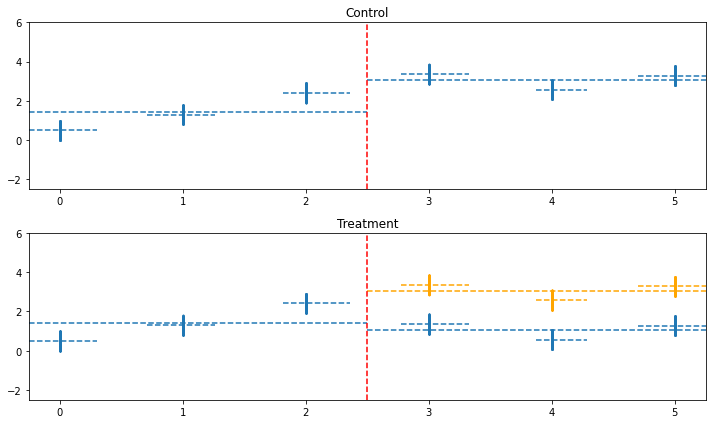

In [5]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(2, 1, 1)
control.plot.scatter(x="t", y="var1", ax=ax, s=1)
ax.axhline(y=means["control_before"], xmin=0, xmax=0.5, linestyle="--")
ax.axhline(y=means["control_after"], xmin=0.5, xmax=1.0, linestyle="--")
for t, xminmax in zip(range(6), tiime_fe_mean_line_pos):
    ax.axhline(y=means["control_t" + str(t)], xmin=xminmax[0], xmax=xminmax[1], linestyle="--")

format_ax(ax)
ax.set_title("Control")

ax = fig.add_subplot(2, 1, 2)
treatment.plot.scatter(x="t", y="var1", ax=ax, s=1)
treatment_cf.query("time_group == 'after'").plot.scatter(x="t", y="var1", ax=ax, color="orange", s=1)
ax.axhline(y=means["treatment_before"], xmin=0, xmax=0.5, linestyle="--")
ax.axhline(y=means["treatment_cf_after"], xmin=0.5, xmax=1.0, linestyle="--", color="orange")
ax.axhline(y=means["treatment_after"], xmin=0.5, xmax=1.0, linestyle="--")
for t, xminmax in zip(range(6), tiime_fe_mean_line_pos):
    ax.axhline(y=means["treatment_t" + str(t)], xmin=xminmax[0], xmax=xminmax[1], linestyle="--")
    if t > 2:
        ax.axhline(y=means["treatment_cf_t" + str(t)], xmin=xminmax[0], xmax=xminmax[1], linestyle="--", color="orange")
format_ax(ax)
ax.set_title("Treatment")

fig.tight_layout()

print("Control before mean {:.3f}".format(means["control_before"]))
print("Control after mean {:.3f}".format(means["control_after"]))
print("Treament before mean {:.3f}".format(means["treatment_before"]))
print("Treament after mean {:.3f}".format(means["treatment_after"]))
print("Treatment counterfactual after mean {:.3f}".format(means["treatment_cf_after"]))

for el in ["control", "treatment", "treatment_cf"]:
    for t in range(6):
        print("{} t_{} mean {:.3f}".format(
            el,
            t, 
            means[el + "_t" + str(t)],
        ))

Control before mean 1.410
Control after mean 3.068
Treament before mean 1.413
Treament after mean 1.065
Treatment estimated counterfactual after mean 3.071
Did-estimate -2.006
control t_0 mean 0.510
control t_1 mean 1.304
control t_2 mean 2.417
control t_3 mean 3.364
control t_4 mean 2.551
control t_5 mean 3.290
treatment t_0 mean 0.497
treatment t_1 mean 1.298
treatment t_2 mean 2.445
treatment t_3 mean 1.354
treatment t_4 mean 0.565
treatment t_5 mean 1.275


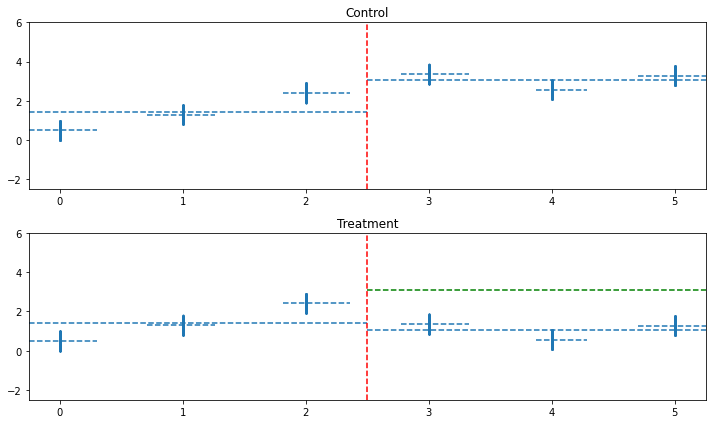

In [6]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(2, 1, 1)
control.plot.scatter(x="t", y="var1", ax=ax, s=1)
ax.axhline(y=means["control_before"], xmin=0, xmax=0.5, linestyle="--")
ax.axhline(y=means["control_after"], xmin=0.5, xmax=1.0, linestyle="--")
for t, xminmax in zip(range(6), tiime_fe_mean_line_pos):
    ax.axhline(y=means["control_t" + str(t)], xmin=xminmax[0], xmax=xminmax[1], linestyle="--")

format_ax(ax)
ax.set_title("Control")

ax = fig.add_subplot(2, 1, 2)
treatment.plot.scatter(x="t", y="var1", ax=ax, s=1)
ax.axhline(y=means["treatment_before"], xmin=0, xmax=0.5, linestyle="--")
ax.axhline(y=means["treatment_before"] + (means["control_after"] - means["control_before"]), xmin=0.5, xmax=1.0, linestyle="--", color="green")
ax.axhline(y=means["treatment_after"], xmin=0.5, xmax=1.0, linestyle="--")
for t, xminmax in zip(range(6), tiime_fe_mean_line_pos):
    ax.axhline(y=means["treatment_t" + str(t)], xmin=xminmax[0], xmax=xminmax[1], linestyle="--")

format_ax(ax)
ax.set_title("Treatment")

fig.tight_layout()

print("Control before mean {:.3f}".format(means["control_before"]))
print("Control after mean {:.3f}".format(means["control_after"]))
print("Treament before mean {:.3f}".format(means["treatment_before"]))
print("Treament after mean {:.3f}".format(means["treatment_after"]))
print("Treatment estimated counterfactual after mean {:.3f}".format(means["treatment_before"] + (means["control_after"] - means["control_before"])))
print("Did-estimate {:.3f}".format(
    (means["treatment_after"] - means["treatment_before"]) -     
    (means["control_after"] - means["control_before"])
))

for el in ["control", "treatment"]:
    for t in range(6):
        print("{} t_{} mean {:.3f}".format(
            el,
            t, 
            means[el + "_t" + str(t)],
        ))

## Regression frame

In [7]:
df = treatment.copy().append(control.copy(), ignore_index=True)
df["time_group"] = df["time_group"].map({"before": 0, "after": 1})
df["tc_group"] = df["tc_group"].map({"control": 0, "treatment": 1})
df["tc_groupxtime_group"] = df["time_group"] * df["tc_group"]
df["t"] = df["t"].astype(str)
df.head(2)

,var1,t,time_group,tc_group,tc_groupxtime_group
0,0.874962,0,0,1,0
1,0.688413,0,0,1,0


## DID regression

In [8]:
reg_str = "var1 ~ 1 + tc_group + time_group + tc_groupxtime_group"
res = smf.ols(reg_str, data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   var1   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1584.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:44:53   Log-Likelihood:                -3713.2
No. Observations:                3600   AIC:                             7434.
Df Residuals:                    3596   BIC:                             7459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4103    

## DID regression with time fixed effects

In [9]:
reg_str = "var1 ~ -1 + t + tc_group + time_group + tc_groupxtime_group"
res = smf.ols(reg_str, data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   var1   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     6116.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:44:53   Log-Likelihood:                -623.82
No. Observations:                3600   AIC:                             1264.
Df Residuals:                    3592   BIC:                             1313.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
t[0]                    0.5018    